In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/priject1/lab8/Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["Species"] = df["Species"].astype('category')
df["Species"] = df["Species"].cat.codes

In [6]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

X = df.drop("Species", axis=1)
X = X.drop("Id", axis=1)
y = df["Species"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [8]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(LDA, X_train, y_train, cv=kfold, scoring='accuracy')
print("For LDA")
print("Accuracy: ", cv_results.mean())
print("Standard Deviation: ", cv_results.std())

For LDA
Accuracy:  0.975
Standard Deviation:  0.053359368645273735


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
X = pd.DataFrame(X_std, columns = X.columns)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components =4)
pca = pca.fit(X)
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
new_list = set(pca.components_[0])
new_list.remove(max(new_list))
print("The feature having high significance are:")
for i in range(len(pca.components_[0])):
  if pca.components_[0][i] == max(pca.components_[0]):
    print(X.columns[i])
for i in range(len(pca.components_[0])):
  if pca.components_[0][i] == max(new_list):
    print(X.columns[i])

The feature having high significance are:
PetalLengthCm
PetalWidthCm


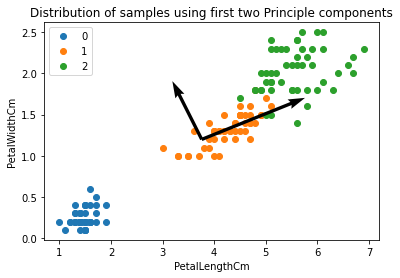

In [13]:
for key, group in df.groupby(['Species']):
    plt.plot(group['PetalLengthCm'], group['PetalWidthCm'],
               label=key, marker='o', linestyle='none')
    
m = np.array([df['PetalLengthCm'].mean(), 
              df['PetalWidthCm'].mean()])

plt.quiver([m[0]]*2, [m[1]]*2, pca.components_[:2,1], pca.components_[:2,0], zorder=11, width=0.01, scale=3)
    
plt.legend(loc=0, fontsize=10)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Distribution of samples using first two Principle components');

In [14]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

In [15]:
lda.explained_variance_ratio_

array([0.99147248, 0.00852752])

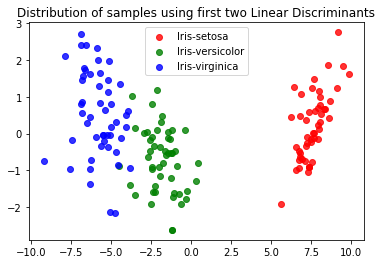

In [16]:
data_plot = X_lda
target_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc=0, shadow=False, scatterpoints=1)
plt.title('Distribution of samples using first two Linear Discriminants');
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()
y_pred = nvb.fit(X_train, y_train).predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

print("Accuracy for model trained on complete dataset:")
accuracy_score(y_test, y_pred)

Accuracy for model trained on complete dataset:


0.9666666666666667

In [19]:
del X_train["SepalLengthCm"]
del X_train["SepalWidthCm"]
del X_test["SepalLengthCm"]
del X_test["SepalWidthCm"]

In [20]:
nvb1 = GaussianNB()
y_pred2 = nvb1.fit(X_train, y_train).predict(X_test)

In [21]:
print("Accuracy for model trained on selected features dataset:")
accuracy_score(y_test, y_pred2)

Accuracy for model trained on selected features dataset:


0.9666666666666667